# Лабораторная работа №2
## Лучи в неоднородной среде. Численное моделирование

### Теория
В геометрической оптике распространение сигнала в неоднородной среде описывается лучами — кривыми, по которым волна распространяется с минимальным временем прохождения. Эти кривые являются минимизаторами функционала, зависящего от скорости распространения в среде.

Введение показателя преломления позволяет получить систему дифференциальных уравнений, описывающую траектории лучей. В двумерном случае такая система удобна для численного анализа.

### Постановка задачи
Рассматривается двумерная среда с показателем преломления
$$ n(y) = \frac{1}{\sqrt{1+y^2}}. $$
Требуется численно решить систему уравнений, построить траектории 3–4 лучей и объяснить их поведение.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

In [2]:
def n(y):
    return 1.0 / np.sqrt(1 + y**2)

def dn_dy(y):
    return -y / (1 + y**2)**(3/2)

In [3]:
def ray_system(t, z, p):
    x, y, q = z
    n_val = n(y)
    dxdt = p / n_val**2
    dydt = q / n_val**2
    dqdt = dn_dy(y) / n_val
    return [dxdt, dydt, dqdt]

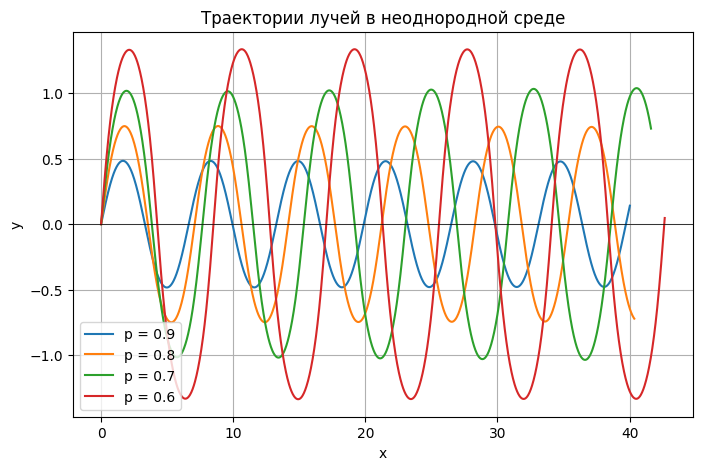

In [4]:
t_span = (0, 40)
t_eval = np.linspace(*t_span, 2000)

plt.figure(figsize=(8, 5))
for p in [0.9, 0.8, 0.7, 0.6]:
    q0 = np.sqrt(n(0)**2 - p**2)
    z0 = [0.0, 0.0, q0]
    sol = solve_ivp(ray_system, t_span, z0, t_eval=t_eval, args=(p,))
    plt.plot(sol.y[0], sol.y[1], label=f'p = {p}')

plt.axhline(0, color='black', linewidth=0.5)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Траектории лучей в неоднородной среде')
plt.legend()
plt.grid(True)
plt.show()

### Вывод
В результате численного моделирования получены траектории лучей, демонстрирующие колебательное движение относительно оси Ox. Такое поведение связано с изменением показателя преломления и соответствует волноводному режиму.